# SBI Insurance Claim Prediction Dataset

For Downloading the Dataset (https://github.com/shubh2002/DataSets)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SBI_Life_Insurance.csv')

In [3]:
df.shape

(1338, 8)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

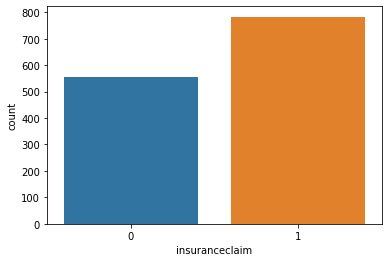

In [6]:
sns.countplot(x='insuranceclaim',data=df)

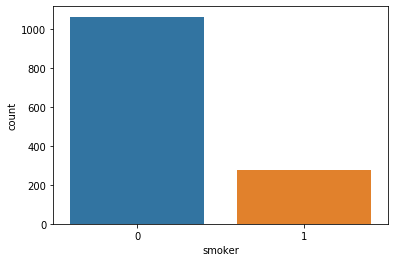

In [7]:
sns.countplot(x='smoker',data=df)

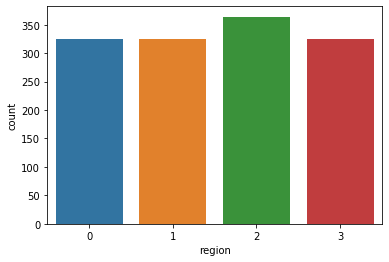

In [8]:
sns.countplot(x='region',data=df)

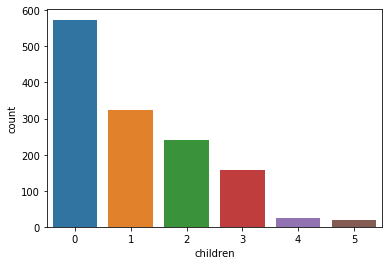

In [9]:
sns.countplot(x='children',data=df)

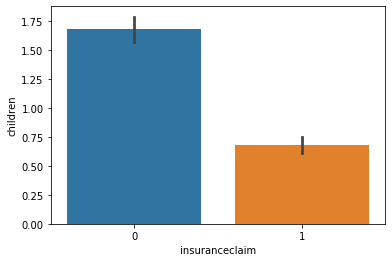

In [10]:
sns.barplot(x='insuranceclaim',y='children',data=df)

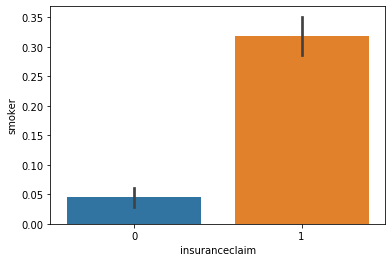

In [11]:
sns.barplot(x='insuranceclaim',y='smoker',data=df)

age                  AxesSubplot(0.125,0.125;0.0824468x0.755)
sex               AxesSubplot(0.223936,0.125;0.0824468x0.755)
bmi               AxesSubplot(0.322872,0.125;0.0824468x0.755)
children          AxesSubplot(0.421809,0.125;0.0824468x0.755)
smoker            AxesSubplot(0.520745,0.125;0.0824468x0.755)
region            AxesSubplot(0.619681,0.125;0.0824468x0.755)
charges           AxesSubplot(0.718617,0.125;0.0824468x0.755)
insuranceclaim    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

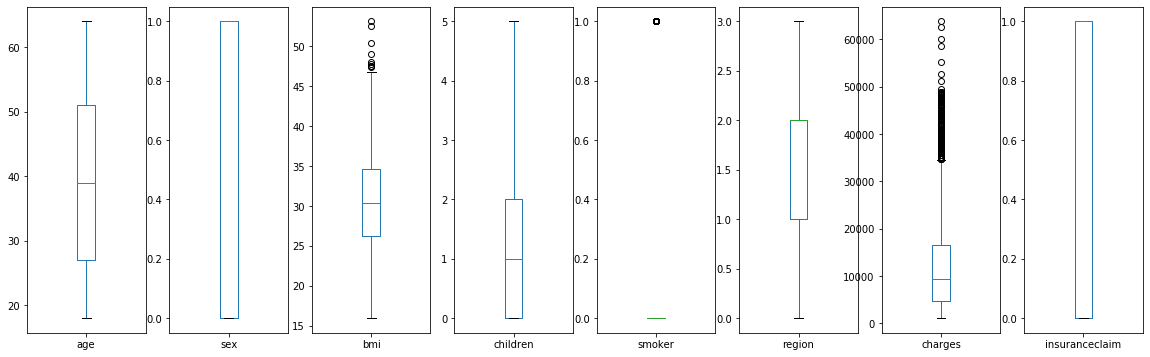

In [12]:
df.plot(kind='box',subplots=True,figsize=(20,6))

In [13]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [14]:
x=df.iloc[:,df.columns!='insuranceclaim']
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
y=df.iloc[:,df.columns=='insuranceclaim']
y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x=scaling.fit_transform(x)

In [18]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1=model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
acc1

0.7880597014925373

In [19]:
from sklearn.svm import SVC
model2=SVC(kernel='linear')
model2=model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
acc2

0.826865671641791

In [20]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
acc3

0.817910447761194

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
acc4

0.6955223880597015

In [25]:
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
print(acc5)
#print(confusion_matrix(y_test,y_pred))

0.9970149253731343


In [26]:
models=pd.DataFrame({'MODELS':['LOGISTIC REGRESSION','SUPPORT VECTOR MACHINE','NAIVE BAYES',
                               'KNEIGHBORS','DECISION TREE CLASSIFIER'],'SCORE':[acc1,acc2,acc3,acc4,acc5]})
models.sort_values(by='SCORE',ascending=False)

,MODELS,SCORE
4,DECISION TREE CLASSIFIER,0.997015
1,SUPPORT VECTOR MACHINE,0.826866
2,NAIVE BAYES,0.817910
0,LOGISTIC REGRESSION,0.788060
3,KNEIGHBORS,0.695522
